# Práctica 8: Dogecoin

Universidad Iberoamericana Ciudad de México, Primavera 2024

Creado por: Luis Norberto Zúñiga Morales

## Carga de librerías

In [1]:
# para cargar datos
import pandas as pd

# por que nunca falta
import numpy as np

# para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# modelos de clasificacion
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# evaluacion de modelos
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Lectura de datos

Vamos a leer los datos con un DataFrame de Pandas:

In [2]:
df = pd.read_csv('DOGE-USD.csv')

Como siempre, es buena idea imprimir unos cuantos para verificar que todo está bien:

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


**Pregunta**: ¿Qué indica cada columna de datos? Escribir su respuesta en una celda de texto abajo.

## Análisis de datos

Noten lo siguiente:

- Es un problema de regresión --> determinar el precio de la criptomoneda.
- Es información estructurada, por lo que distintos algoritmos se pueden ajustar a esta tarea sin problema alguno.
- Aún en este caso, necesitamos analizar la información para determinar cualquier caso excepcional.

Iniciemos con un análisis de correlación entre las variables:

In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


<ipython-input-6-6c5720887c8a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


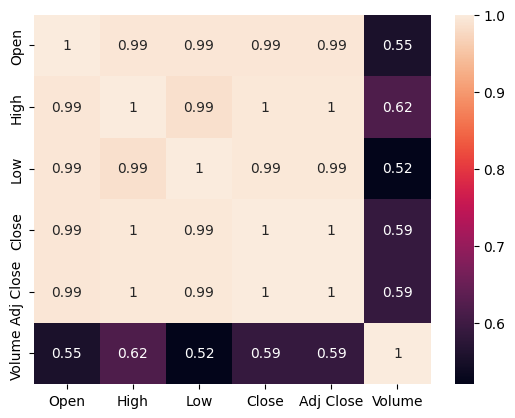

In [6]:
ax = sns.heatmap(df.corr(), annot=True)

Después, vamos a procesar un poco las fechas. Estamos trabajando con una serie de tiempo, por lo que las fechas deben ajustarse a nuestra idea:

- Convertir las fechas desde un formato de String a uno de Date.
- Usar esa fecha como el índice de los datos.

In [7]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.set_index('Date', inplace=True)

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


¿Existen datos nulos en el conjunto de datos?

In [9]:
df.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

¿Cuántos datos nulos existen en cada columna?

In [10]:
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

¿Qué opciones existen para manejar datos nulos? Lo más sencillo es identificarlos y eliminarlos (siempre que el tamaño del conjunto de datos lo permita).

In [11]:
df = df.dropna()

Ahora, vamos a realizar un análisis estadístico que nos provee Pandas.

In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


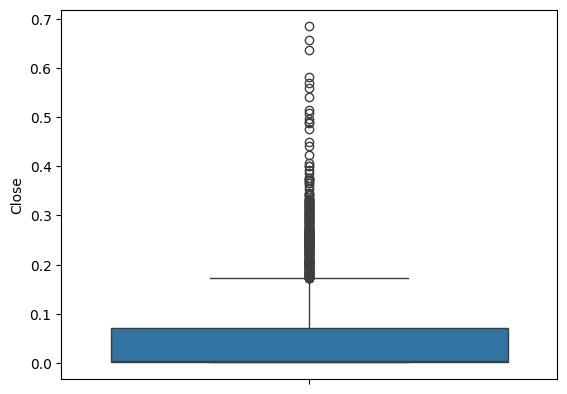

In [14]:
ax = sns.boxplot(df, y = 'Close')

Perfecto, ahora vamos a analizar el precio de cierre, que es el que usaremos para determinar los precios futuros:

Text(0.5, 1.0, 'Fecha vs Precio de Cierre')

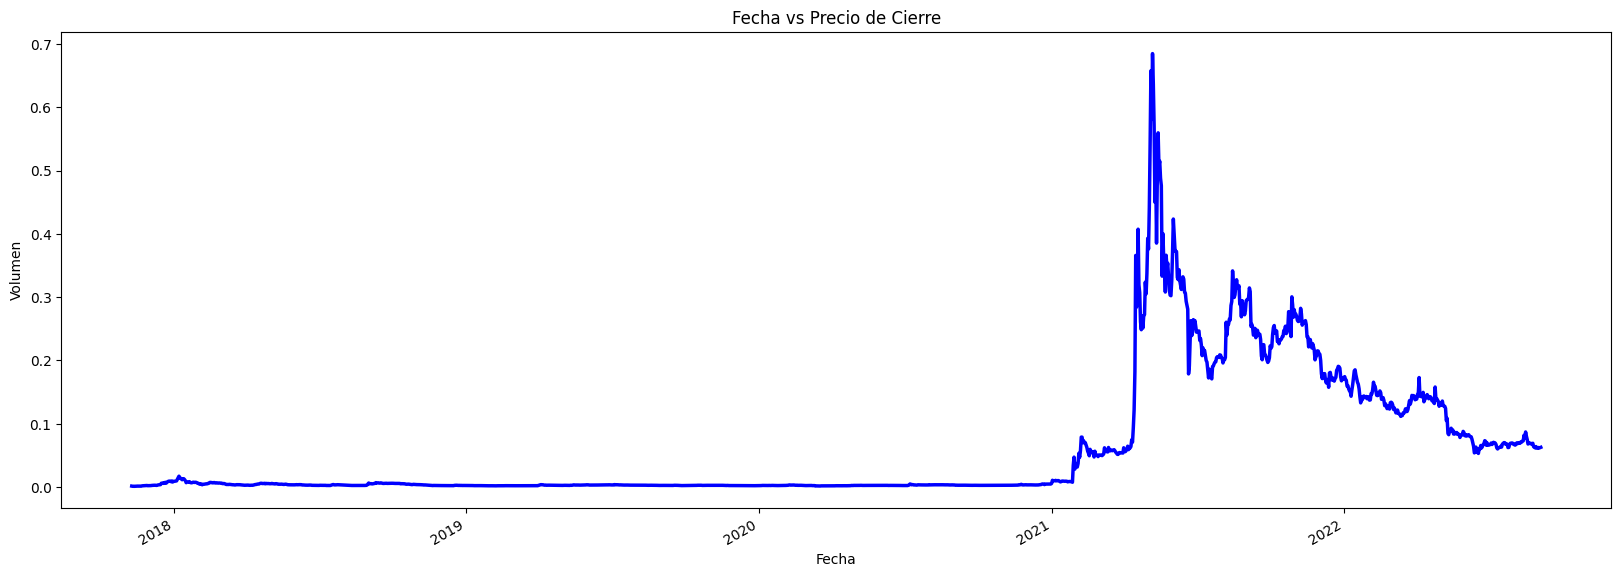

In [15]:
plt.figure(figsize=(20, 7))
x = df.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title("Fecha vs Precio de Cierre")

La columna `Close` es nuestra característica para predecir. Tomamos diferentes factores de los predefinidos para nuestro cálculo y los nombramos adecuadamente. Además, verificamos cada factor mientras lo correlacionamos con la columna `Close` y lo clasificamos en orden descendente.

In [16]:
df["gap"] = (df["High"] - df["Low"]) * df["Volume"]
df["y"] = df["High"] / df["Volume"]
df["z"] = df["Low"] / df["Volume"]
df["a"] = df["High"] / df["Low"]
df["b"] = (df["High"] / df["Low"]) * df["Volume"]
abs(df.corr()["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

Al observar los factores correlacionados, podemos elegir algunos de ellos. Excluimos `High`, `Low` y `Open` ya que están altamente correlacionados desde el principio.

In [17]:
df = df[["Close", "Volume", "gap", "a", "b"]]
df.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


## Partición de datos

In [18]:
train = df[:-40]
test = df[-40:-20]
val = df[-20:]

print(train.shape, test.shape, val.shape)

(1720, 5) (20, 5) (20, 5)


In [19]:
X_train = train.drop(columns=['Close'])
y_train = train['Close']

X_test = test.drop(columns=['Close'])
y_test = test['Close']

X_val = val.drop(columns=['Close'])
y_val = val['Close']

## Definición y entrenamiento de modelos

Vamos a utilizar los siguientes modelos para predecir el precio de cierre de los datos:

- Regresión lineal simple
- k Vecinos Más Cercanos para regresión

### Modelo de regresión lineal simple

Definimos y entrenamos el modelo:

In [20]:
reg = LinearRegression().fit(X_train, y_train)

Realizamos predicciones:

In [21]:
y_pred = reg.predict(X_val)

In [22]:
r2_score_lreg_val = r2_score(y_val, y_pred)
mse_lreg_val = mean_squared_error(y_val, y_pred)

In [23]:
print(f'R2 score for LinReg with val: {r2_score_lreg_val}')
print(f'MSE score for LinReg with val: {mse_lreg_val}')

R2 score for LinReg with val: -6.112056948903427
MSE score for LinReg with val: 0.00032749528395920437


Evaluamos con el conjunto de prueba para comparar resultados con otros modelos:

In [24]:
y_pred = reg.predict(X_test)

In [25]:
r2_score_lreg_test = r2_score(y_test, y_pred)
mse_lreg_test = mean_squared_error(y_test, y_pred)

In [26]:
print(f'R2 score for LinReg with test: {r2_score_lreg_test}')
print(f'MSE score for LinReg with test: {mse_lreg_test}')

R2 score for LinReg with test: -33.11108312655007
MSE score for LinReg with test: 0.00043526467364910626


### Modelo de kNN

Para este modelo, vamos a necesitar usar el conjunto de validación para determinar el número óptimo de vecinos para el modelo de regresión. Una vez que determinemos ese valor, para comparar su desempeño, se utiliza el conjunto de prueba.

Definimos y entrenamos el modelo:

In [27]:
k_results = []
for k in range(1,11):
  # definimos y entrenamos el modelo
  neigh = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
  # predicciones
  y_pred = neigh.predict(X_val)
  # evaluacion del modelo
  k_results.append(mean_squared_error(y_val, y_pred))

Text(0, 0.5, 'MSE')

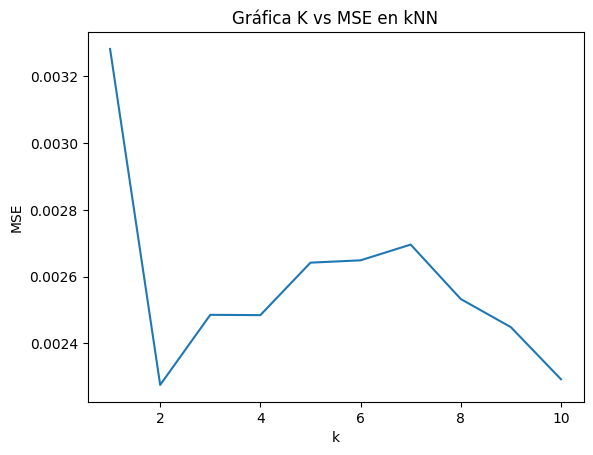

In [28]:
plt.figure()
plt.plot(range(1,11), k_results)
plt.title('Gráfica K vs MSE en kNN')
plt.xlabel('k')
plt.ylabel('MSE')

**Pregunta**: ¿A partir de la gráfica que valor usamos para $k$?

Entrenamos el modelo de kNN con $k=2$, y ahora sí evaluamos con el conjunto de prueba para obtener un resultado de comparación.

In [29]:
# definimos y entrenamos el modelo
neigh = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
# predicciones
y_pred = neigh.predict(X_test)

In [30]:
r2_score_kn_test = r2_score(y_test, y_pred)
mse_knn_test = mean_squared_error(y_test, y_pred)

In [31]:
print(f'R2 score kNN with test: {r2_score_kn_test}')
print(f'MSE score kNN with test:: {mse_knn_test}')

R2 score kNN with test: -115.42292536418006
MSE score kNN with test:: 0.0014855812823625


## Actividad

1. Propongan un modelo de regresión polinomial (del grado que ustedes quieran) para el modelo y determinen su error medido con $R^2$ y el ECM.
2. Para el mismo modelo anterior, consideren un modelo Ridge y determinan sus errores.
3. Investiguen la manera de usar una red neuronal para el caso de regresión. Construyan una red neuronal, entrénenla y determinen los errores correspondientes.
4. Juntando todo lo anterior, ¿cuál es el mejor modelo?
5. ¿Por qué los errores son *pequeños*? ¿Nos podemos confiar antes estos resultados?